In [154]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt

Замерьте время вычисления чисел от 0 до 1 из равномерного распределения с помощью модулей random и numpy.

Изобразите зависимость времени вычисления от количества вычисляемых чисел для них. 

Другими словами - по x идёт то, сколько чисел за прогон вы взяли от 0 до 1, а по y - время, которое это заняло для random и numpy


# 1


Measures the time it takes to compute numbers from 0 to 1 from a uniform distribution using the random and numpy modules.

In [122]:
%timeit -n 10000 -o -r 100000 random.random() 

The slowest run took 49.90 times longer than the fastest. This could mean that an intermediate result is being cached.
104 ns ± 62.4 ns per loop (mean ± std. dev. of 100000 runs, 10000 loops each)


<TimeitResult : 104 ns ± 62.4 ns per loop (mean ± std. dev. of 100000 runs, 10000 loops each)>

In [119]:
res = _

In [147]:
np.array([random.random() for _ in range(number_numbers)])

array([0.])

In [121]:
from statistics import mean

mean(vars(res)['all_runs'])

0.0008800661730047432

In [140]:
#%%timeit

np.random.uniform(0, 1)

0.23949474503691504

In [137]:
random.randint(0, 1)

0

In [146]:
[random.random() for _ in range(10)]

[0.10444645338724678,
 0.265657464898867,
 0.5364225387060116,
 0.2600919196476118,
 0.9648800380395326,
 0.39592305628495694,
 0.3962488691859425,
 0.7960554023673007,
 0.5140353626586729,
 0.23643293925527498]

And then it plots the dependence of the computation time on the number of computed numbers for them.

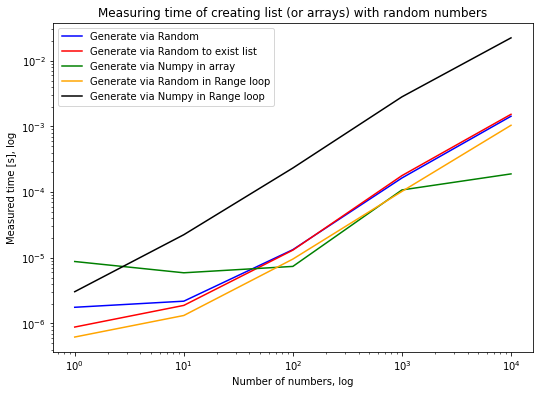

In [215]:
def random_list_timer(number_numbers):
    '''
    Measures time of creating random lists orr arrays.
    For a more accurate calculation, the measurement is repeated 5 rows.
    '''
    end_random_generate, end_random_prelist, end_np = 0, 0, 0
    iters = 5

    for _ in range(iters):
        start_random = timer()
        [random.random() for _ in range(number_numbers)]
        end_random_generate += timer() - start_random

        start_random = timer()
        pre_list = [0] * number_numbers
        for i in range(number_numbers):
            pre_list[i] = random.random()
        end_random_prelist += timer() - start_random

        start_np = timer()
        np.random.uniform(0, 1, number_numbers)
        end_np += timer() - start_np

    return end_random_generate / iters, end_random_prelist / iters, end_np / iters


def random_timer_range(number_numbers):
    '''
    Measures time of creating random numbers in "range" loop.
    For a more accurate calculation, the measurement is repeated 5 rows.
    '''
    end_random_generate, end_np = 0, 0
    iters = 5

    for _ in range(iters):
        start_random = timer()
        for _ in range(number_numbers):
            random.random()
        end_random_generate += timer() - start_random

        start_np = timer()
        for _ in range(number_numbers):
            np.random.uniform(0, 1)
        end_np += timer() - start_np

    return end_random_generate / iters, end_np / iters


def generate_plot_list():
    '''
    Measures time of generete random list via Random (uses pre-created list and without it) and
    random array via Numpy.
    Also measures time of generete random numbers via Random and via Numpy in 'range' loop.
    Generates plot.
    '''
    timer_random_generate, timer_random_prelist, timer_np = [], [], []
    timer_random_loop, timer_np_loop = [], []
    number_n = [int(i) for i in np.logspace(0, 5, num=5-0, endpoint=False)]

    for n in number_n:
        end_random_generate, end_random_prelist, end_np = random_list_timer(n)
        end_range_random, end_range_np = random_timer_range(n)
        timer_random_generate.append(end_random_generate)
        timer_random_prelist.append(end_random_prelist)
        timer_np.append(end_np)
        timer_random_loop.append(end_range_random)
        timer_np_loop.append(end_range_np)
    
    fig, ax = plt.subplots()
    ax.plot(number_n, timer_random_generate, label='Generate via Random', color='blue')
    ax.plot(number_n, timer_random_prelist, label='Generate via Random to exist list', color = 'red')
    ax.plot(number_n, timer_np, label='Generate via Numpy in array', color = 'green')
    ax.plot(number_n, timer_random_loop, label='Generate via Random in Range loop', color = 'orange')
    ax.plot(number_n, timer_np_loop, label='Generate via Numpy in Range loop', color = 'black')
    plt.title('Measuring time of creating list (or arrays) with random numbers')
    plt.xlabel('Number of numbers, log')
    plt.ylabel('Measured time [s], log')
    plt.tight_layout()
    ax.legend()
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.gcf().set_size_inches(8, 6)
    #plt.savefig('python_homework/random_practice/Plots/random_numbers.png', dpi=100, bbox_inches='tight')
    plt.show()
    plt.close()
    
generate_plot_list()

# 2

Сделайте функцию для проверки является ли список отсортированным (без использования sorted или sort).

Затем реализуйте monkey sort, а потом визуализируйте следующее: распределение времени работы алгоритма от размера сортируемого списка. То есть по x идёт размер массива, а по y - среднее время нескольких прогонов и их отклонение (или дисперсия)

# 3

Визуализируйте random walk (случайная прогулка, да)) в 2-мерном пространстве, где вы начинаете в (0, 0) и можете перемещаться вверх, вниз, вправо и влево Как визуализировать - скаттерплот, где по x - x, а по y - y

# 4

Сгенерируйте и нарисуйте треугольник Серпинского, подсказки в прикреплённых ссылках

https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle



# 5

Сделайте программу, получающую на вход текст, и выдающую этот же текст со следующими изменениями - буквы во всех словах кроме первой и последней перемешаны. Для простоты пока будем считать, что пунктуации нет. 

Пример: "По рзеузльаттам илссоевадний одонго анлигсйокго унвиертисета, не иеемт занчнеия, в каокм проякде рсапжоолены бкувы в солве. Галовне, чотбы преавя и пслонедяя бквуы блыи на мсете. осатьлыне бкувы мгоут селдовтаь в плоонм бсепордяке, все-рвано ткест чтаитсея без побрелм. Пичрионй эгото ялвятеся то, что мы не чиаетм кдаужю бкуву по отдльенотси, а все солво цлиеком."